In [29]:
# IMPORTS
import re, numpy as np, random
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from pathlib import Path
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [2]:
films=[]
for p in Path("C:/Users/forem/Code/text-as-data/people/Foreman/Adventure").glob('*.txt'):
    with open(p, mode="r", encoding="utf-8") as f:
        film = f.read()
        films.append(film)


print(len(films))

166


In [3]:
sample = random.choice(films)
print(sample)
print(sia.polarity_scores(sample))

                                     TMNT

                                  Written by

                                 Kevin Munroe

                                  Created by

                         Kevin Eastman & Peter Laird

                                                  First Draft Polish

                                                      August 5, 2005

              FADE IN:

              EXT. STAR-FILLED SKY - NIGHT                                  1

              Studio logo transitions into a CONSTELLATION in space. Cam

              pulls BACK, as more stars enter frame, forming a starfield.

                                   SPLINTER (V.O.)

                         A sensei once counseled a grief-

                         stricken boy, as his older brother

          3

                         prepared to leave for battle.

               N STARS - Begin to see a DOZEN or so stars, almost forming a

              zig-zagged line. Cam continues to adjust

In [4]:
positive_words = [word for word in sample.split() if sia.polarity_scores(word)['compound'] > 0]
print("Positive Words:", positive_words)

Positive Words: ['Created', 'prepared', 'importantly,', 'tops', 'SUPER', 'peaceful', 'CHUCKLE.', 'appreciate', 'generous', 'precious', 'safe', 'grins.', 'LAUGHING.', 'Well,', 'god', 'reaches', 'calm,', 'strong.', 'smiling', 'hero', 'poised', 'backed', 'miracle!', 'rejoices.', 'smiles.', 'carefully', 'CREDIT', 'Smiles.', 'escape.', 'gains', 'like', 'like', 'reaches', 'grinning', 'commit', 'RESCUED', 'reaches', 'grinning.', 'Nice', 'Calming.', 'relax,', 'fine.', 'like', 'smile.', 'Okay', 'Yeah!', 'best', 'Beautiful', 'PARTY', 'friendly', 'TOP.', 'Thanks', 'worth', 'friends', 'love', 'hope', 'lovely', 'smile', 'Okay!', 'hand', 'reaches', 'fresh', 'SMILE', 'like', 'good', 'emotional,', 'Well,', 'agree', 'security', 'SMILE,', 'clear', 'smile.', 'gaining', 'friend.', 'fun', 'like', 'smiles', 'Breathtaking', 'fresh', 'wonderful', 'kind', 'party.', 'CLEARS', 'hand.', 'share.', 'Yes,', 'sparkle', 'Well?', 'reaches', 'hand', 'Nice', 'reaches', 'well,', 'reaching', 'Careful!', 'admires', 'Admires

Some movies such as Jurassic Park have their positive word count flooded with the main protagonist name if they are seen
as heroic or helpful.

In [5]:
positive_word_count = len([word for word in sample.split() if sia.polarity_scores(word)['compound'] > 0])
print("Number of Positive Words:", positive_word_count)
# This is just for comparison between the total number of positive words when the cells before are rerun to pull a
# different text file

Number of Positive Words: 689


In [6]:
negative_words = [word for word in sample.split() if sia.polarity_scores(word)['compound'] < 0]
print("Negative Words:", negative_words)

Negative Words: ['grief-', 'stricken', 'leave', 'battle.', 'cry?', 'broken', 'war.', 'neglect.', 'stop', 'LOWERS', 'LOWER', 'STINKING', 'stopped', 'GUN', 'mad.', 'cries.', 'indifference.', 'EVIL', 'disgusting', 'dangerous', 'looms', 'ominous', 'fallen', 'HARD.', 'darkness.', 'SCREAMS', 'freaking', 'gun.', 'Ghost', 'punishes', 'weak.', 'scared', 'gun', 'beaten', 'sorry,', 'SCREAMING', 'COWARD!!', 'backs', 'Tense.', 'attacks.', 'attacker', 'Panicked.', 'tears', 'Panicked.', 'violated', 'GHOST!', 'ATTACKER', 'ATTACKER', 'Beaten', 'battle.', 'ghost', 'die,', 'SCREAMS', 'CUT', 'panic', 'no', 'stolen', 'stolen', 'darkness.', 'Ghost', 'STOP', 'SHOOT!', 'panicked', 'avoid', 'arrest.', 'Heh,', 'suckers.', 'Scary', 'lower', 'stopping', 'drags', 'DEAD', 'collides', 'stops.', 'freak', 'freak', 'kill', 'terrified', 'COMBAT', 'stops', 'trapped', 'beating', 'criminal', 'drop.', 'crime', 'Broken', 'stop.', 'shaking', 'Heh,', 'heh.', 'tears', 'scared!', 'CUT', 'FEAR.', 'Nervously', 'danger.', 'panic.',

In [7]:
negative_word_count = len([word for word in sample.split() if sia.polarity_scores(word)['compound'] < 0])
print("Number of Negative Words:", negative_word_count)
# This is just for comparison between the total number of negative words when the cells before are rerun to pull a different
# text file

Number of Negative Words: 742


All code above just pulls a random single text file from the films list and displays the list of positive and negative numbers along with the counts for each.

In [66]:
text = films[2]
print(text[0:100])

				    2001: A SPACE ODYSSEY

					    Screenplay

						   by

			   Stanley Kubrick and Arthur C.


In [67]:
print(sia.polarity_scores(text))

{'neg': 0.086, 'neu': 0.797, 'pos': 0.117, 'compound': 1.0}


The two code blocks above create a new item named text based on the films list that allows you to pull
a specified file from the films list. With this new item the next code block runs and returns a polarity score.

In [ ]:
sentences = sent_tokenize(text)
# print(sentences[0:10])

scores = []
for sentence in sentences:
    score = sia.polarity_scores(sentence)["compound"]
    scores.append(score)

# print(scores[10:100])

# Program to calculate moving average
window_size = 100

i = 0
# Initialize an empty list to store moving averages
moving_averages = []

# Loop through the array to consider
# every window of size 3
while i < len(scores) - window_size + 1:

	# Store elements from i to i+window_size
	# in list to get the current window
	window = scores[i : i + window_size]

	# Calculate the average of current window
	window_average = round(sum(window) / window_size, 2)
	
	# Store the average of current
	# window in moving average list
	moving_averages.append(window_average)
	
	# Shift window to right by one position
	i += 1

print(len(moving_averages))
print(len(scores))

The code block above is all the necessary steps to create a sentiment analysis based on the sentences and return the compund scores.
Then it creates an adjustable moving average to go and return an average based on the window size

In [74]:
values = enumerate(moving_averages)
x, y = zip(*values)

The second line of code in the block above takes the value pairs in values and unpacks them into
separate list

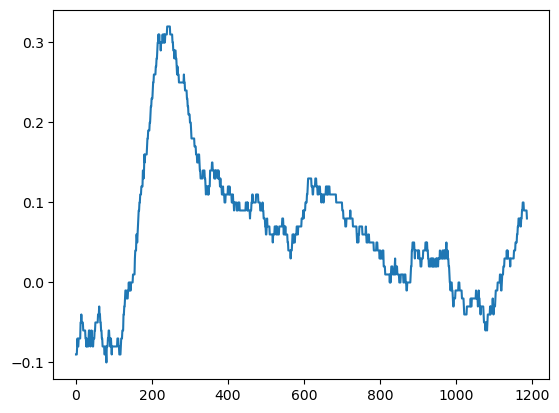

In [75]:
plt.plot(x, y)
plt.show()